In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium


In [13]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [14]:
df=pd.read_excel("/Users/tahsinturjo/Desktop/COVID-19-worldwide.xlsx")

In [15]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [16]:
df.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61625
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [18]:
df.size

742800

In [19]:
df.shape

(61900, 12)

In [20]:
df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [21]:
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [22]:
df.notnull().sum()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61625
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

In [23]:
df.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [24]:
df['countriesAndTerritories'].value_counts()

Canada                                        350
Germany                                       350
Iran                                          350
Belgium                                       350
Taiwan                                        350
                                             ... 
Cases_on_an_international_conveyance_Japan     64
Solomon_Islands                                60
Wallis_and_Futuna                              59
Marshall_Islands                               47
Vanuatu                                        34
Name: countriesAndTerritories, Length: 214, dtype: int64

In [14]:
df[df.countriesAndTerritories == 'France']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
20364,2020-12-14,14,12,2020,11533,150,France,FR,FRA,67012883.0,Europe,236.326200
20365,2020-12-13,13,12,2020,13947,194,France,FR,FRA,67012883.0,Europe,233.716254
20366,2020-12-12,12,12,2020,13406,627,France,FR,FRA,67012883.0,Europe,231.556968
20367,2020-12-11,11,12,2020,13750,292,France,FR,FRA,67012883.0,Europe,230.263187
20368,2020-12-10,10,12,2020,14595,296,France,FR,FRA,67012883.0,Europe,229.984136
...,...,...,...,...,...,...,...,...,...,...,...,...
20709,2020-01-04,4,1,2020,0,0,France,FR,FRA,67012883.0,Europe,NaN
20710,2020-01-03,3,1,2020,0,0,France,FR,FRA,67012883.0,Europe,NaN
20711,2020-01-02,2,1,2020,0,0,France,FR,FRA,67012883.0,Europe,NaN
20712,2020-01-01,1,1,2020,0,0,France,FR,FRA,67012883.0,Europe,NaN


In [25]:
df['continentExp'].value_counts()

Europe     17372
Africa     14981
America    13742
Asia       13241
Oceania     2500
Other         64
Name: continentExp, dtype: int64

In [37]:
#df.style.background_gradient(cmap='Reds')

# Cases based on countries
### Ascending, groupby

In [26]:
total_cases= df.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False).to_frame()

In [27]:
total_cases.count()
print('Total countries =', total_cases.count())

Total countries = cases    214
dtype: int64


In [28]:
total_cases.head(10)  # as of Jan 2019 to Dec 2020

,cases
countriesAndTerritories,
United_States_of_America,16256754
India,9884100
Brazil,6901952
Russia,2653928
France,2376852
United_Kingdom,1849403
Italy,1843712
Spain,1730575
Argentina,1498160


In [80]:
#total_cases.style.background_gradient(cmap='Reds')

In [29]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


# Cases based on continent

In [30]:
total_cases_continent= df.groupby('continentExp')['cases'].sum().sort_values(ascending=False).to_frame()

In [31]:
total_cases_continent

,cases
continentExp,
America,30887593
Europe,21400012
Asia,16782046
Africa,2379827
Oceania,53440
Other,696


In [32]:
total_cases_continent.style.background_gradient(cmap='Greens')

,cases
continentExp,
America,30887593
Europe,21400012
Asia,16782046
Africa,2379827
Oceania,53440
Other,696


# Grouping data based on countries and territories

In [33]:
countries=df.groupby('countriesAndTerritories')

In [35]:
countries

# Finding dataframes assigned for each country

In [36]:
for countriesAndTerritories, countriesAndTerritories_df in countries:
    print(countriesAndTerritories)


Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua_and_Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire, Saint Eustatius and Saba
Bosnia_and_Herzegovina
Botswana
Brazil
British_Virgin_Islands
Brunei_Darussalam
Bulgaria
Burkina_Faso
Burundi
Cambodia
Cameroon
Canada
Cape_Verde
Cases_on_an_international_conveyance_Japan
Cayman_Islands
Central_African_Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa_Rica
Cote_dIvoire
Croatia
Cuba
CuraÃ§ao
Cyprus
Czechia
Democratic_Republic_of_the_Congo
Denmark
Djibouti
Dominica
Dominican_Republic
Ecuador
Egypt
El_Salvador
Equatorial_Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland_Islands_(Malvinas)
Faroe_Islands
Fiji
Finland
France
French_Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea_Bissau
Guyana
Haiti
Holy_See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq


# Finding individual dafaframes using the key ,NOTE: each country name is a key.

In [37]:
countries.get_group('Sudan')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
53413,2020-12-14,14,12,2020,239,3,Sudan,SD,SDN,42813237.0,Africa,8.779995
53414,2020-12-13,13,12,2020,679,25,Sudan,SD,SDN,42813237.0,Africa,9.527427
53415,2020-12-12,12,12,2020,0,0,Sudan,SD,SDN,42813237.0,Africa,8.417957
53416,2020-12-11,11,12,2020,384,12,Sudan,SD,SDN,42813237.0,Africa,9.999244
53417,2020-12-10,10,12,2020,0,0,Sudan,SD,SDN,42813237.0,Africa,9.102325
...,...,...,...,...,...,...,...,...,...,...,...,...
53684,2020-03-18,18,3,2020,0,0,Sudan,SD,SDN,42813237.0,Africa,NaN
53685,2020-03-17,17,3,2020,0,0,Sudan,SD,SDN,42813237.0,Africa,NaN
53686,2020-03-16,16,3,2020,0,0,Sudan,SD,SDN,42813237.0,Africa,NaN
53687,2020-03-15,15,3,2020,0,1,Sudan,SD,SDN,42813237.0,Africa,NaN


In [38]:
countries2=df.groupby('continentExp')

In [39]:
countries2

In [40]:
countries.get_group('Yemen')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61111,2020-12-14,14,12,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,0.020575
61112,2020-12-13,13,12,2020,1,0,Yemen,YE,YEM,29161922.0,Asia,0.030862
61113,2020-12-12,12,12,2020,1,0,Yemen,YE,YEM,29161922.0,Asia,0.027433
61114,2020-12-11,11,12,2020,2,0,Yemen,YE,YEM,29161922.0,Asia,0.024004
61115,2020-12-10,10,12,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,0.020575
...,...,...,...,...,...,...,...,...,...,...,...,...
61355,2020-04-14,14,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN
61356,2020-04-13,13,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN
61357,2020-04-12,12,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN
61358,2020-04-11,11,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN


In [41]:
#['cases'].sum().sort_values(ascending=False).to_frame()

In [48]:
df.head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768


In [62]:
df['continentExp'].value_counts().sort_values(ascending=False)

Europe     17372
Africa     14981
America    13742
Asia       13241
Oceania     2500
Other         64
Name: continentExp, dtype: int64

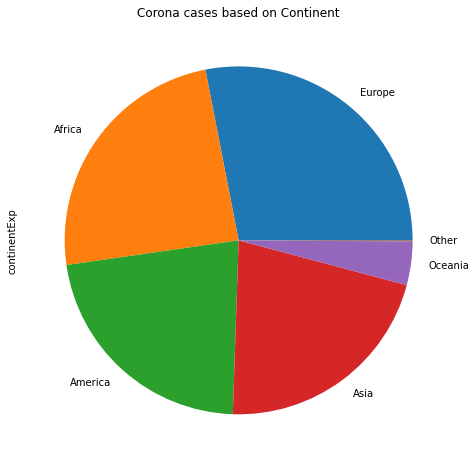

In [79]:
df['continentExp'].value_counts().plot(kind='pie', figsize=(8,8), title="Corona cases based on Continent")

Text(0.5, 0, 'Continent')

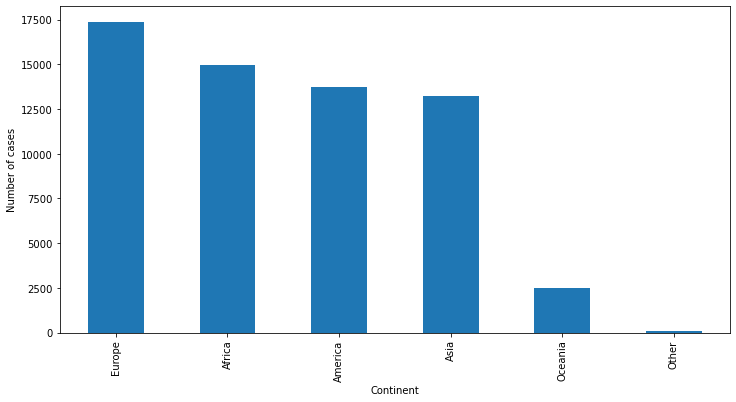

In [77]:
x= df['continentExp'].value_counts().plot(kind='bar', figsize=(12,6))
x.set_ylabel('Number of cases')
x.set_xlabel('Continent')